# Pandas 入門

Pandas はデータ操作によく用いられるパッケージであり、CSV などの一般的なデータ形式で保存されたデータの読み込みや、条件を指定しての一部データの抽出など、機械学習手法で取り扱うデータを事前に整理したり、まとめたりするのに便利です。

今回は Pandas の以下の代表的な機能の使い方を説明します。

- CSV ファイルの読み書き
- 統計量の算出
- 並び替え
- データの抽出
- 条件を指定した抽出
- 条件を指定した置換
- 欠損値の除去 / 補間
- NumPy と pandas を相互に変換
- グラフの描画

まず Pandas パッケージを読み込みましょう。
`pandas` は `pd` という別名を与えて用いるのが一般的です。

In [1]:
import pandas as pd

## CSV ファイルの読み書き

データセットは Google Colaboratory で用意されているサンプルデータを使用します。
Google Colaboratory 以外で実行する場合は、[こちら](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv)をダウンロードして、使用してください。



Pandas では CSV ファイルを読み込むための `pd.read_csv()` という関数が用意されています。
こちらを使って CSV ファイルを読み込みます。

In [2]:
# データセットの読み込み
df = pd.read_csv('sample_data/california_housing_train.csv')

`df` という変数名は、**データフレーム (data frame)** という Pandas で中心的に用いられる**データ構造 (data structure)** を表すクラスの名前の頭文字に由来しています。
`pd.read_csv()` 関数は、CSV ファイルの内容を `DataFrame` オブジェクトに読み込みます。

In [3]:
# 型の確認
type(df)

pandas.core.frame.DataFrame

## DataFrame の表示

`df` に読み込まれたデータの中身の確認してみましょう。
Jupyter Notebook 上では、大きな DataFrame を表示しようとすると自動的に一部が省略されることがあります。

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


## 先頭の数件だけを表示

データを数件のみ確認したい場合は、データフレームがもつ `head()` メソッドを使用します。
`head()` はデフォルトで先頭から 5 件のデータを表示しますが、`head(3)` のように引数に表示したいデータ件数を指定すると、指定された件数だけを表示することもできます。
それでは、`head()` を実行してみましょう。

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


各列にアクセスしたい場合には、辞書のように列の名前をキーとしてしているするとアクセスすることができます。

In [7]:
df['longitude'].head(3)

0   -114.31
1   -114.47
2   -114.56
Name: longitude, dtype: float64

## CSV ファイルの保存

Pandas ではCSVファイルの読み込みだけでなく、書き込みを簡単に行う `to_csv()` が用意されています。

In [8]:
df.to_csv('sample.csv')

In [9]:
%%bash
ls sample.csv

sample.csv


## 統計量の算出

`pandas.DataFrame` は `numpy.ndarray`と同じような機能を持っており、統計量やデータ構造に関する情報が簡単に取得できます。

In [10]:
# 形の確認
df.shape

(17000, 9)

In [11]:
# 平均
df.mean()

longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
dtype: float64

In [12]:
# レコードの数（欠損値を見つけるために使えます）
df.count()

longitude             17000
latitude              17000
housing_median_age    17000
total_rooms           17000
total_bedrooms        17000
population            17000
households            17000
median_income         17000
median_house_value    17000
dtype: int64

また、データの特徴をおおまかに理解するためにとても便利な機能として、概要を算出できる `describe()` 関数も用意されています。

In [13]:
# データの概要
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


また、もうひとつ便利な関数として相関係数を算出する `corr` があります。
入力変数間や入出力間の相関を事前に手軽に確認することができます。

In [14]:
# 相関係数の算出
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


## 並び替え

昇順 (ascending) や降順 (descending) にある列を対象として `sort_values()` を用いて並び替えを行えます。
なお、関数を実行した際に、`df` のデータに対して並べ替えした結果が上書きされるわけではないため、別の変数を用意します。

In [15]:
# total_rooms の列を基準に昇順に並び替え
df_as = df.sort_values(by='total_rooms')

In [16]:
df_as.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2990,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0
16309,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0
8188,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0
15369,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0
15656,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,350000.0


この結果から分かる通り、デフォルトの設定では、小さいものから順番に並べられた昇順となっています。
降順に並べ替える場合は、関数の引数を確認（Google Colablatoryの場合は tab を 2 回押す）するとわかりますが、`ascending=True` とデフォルトの設定となっているところを `ascending=False` のように変更します。

In [17]:
# total_roomsの列を基準に降順に並び替え
df_de = df.sort_values(by='total_rooms', ascending=False)

In [18]:
df_de.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0
2969,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0
8881,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,399200.0
1116,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,212300.0


## データの抽出

必要な要素や行、列を抽出することも簡単にできます。
[scikit-learn 入門](https://tutorials.chainer.org/ja/src/09_Introduction_to_Scikit-learn_ja.html)の章で説明した通り、入力変数 `x` と目標値 `t` を用意する必要があります。このようなとき、入力変数に対応する列と目標値に対応する列だけをそれぞれ抽出するということができます。

今回は右端の列である `median_house_value` が目標値でそれ以外が入力変数だとした場合に、それぞれのデータの抽出を行います。
列や行の選択を行う方法にはいくつかありますが、その中でもよく使われる `iloc` を今回は紹介します。

In [19]:
# データの確認
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [20]:
# df.iloc[行, 列]
# 0番目のlongitude
df.iloc[0, 0]

-114.31

In [21]:
# 1番目のlatitude
df.iloc[1, 1]

34.4

`iloc` はリストのスライス機能と同じであり、複数行や複数列は `:` をうまく使いましょう。
また、`-1` は最後の要素を意味するため、これもうまく使いましょう。

In [22]:
# すべて (:) の行で、最後 (-1) の列
t = df.iloc[:, -1]

In [23]:
# 先頭3件の表示
t.head(3)

0    66900.0
1    80100.0
2    85700.0
Name: median_house_value, dtype: float64

In [24]:
# 型の確認
type(t)

pandas.core.series.Series

1列だけ抽出した際には、`pandas.Series` になります。
`pandas.DataFrame` のようにテーブルが綺麗に表示されなくなりますが、平均の算出などは同様に行うことができます。

In [25]:
# すべて (:) の行で、最初 (0) から最後 (-1) の列のひとつ手前まで
x = df.iloc[:, 0:-1]

最初の 0 は省略できるため、一般的に以下のように書きます。

In [26]:
# すべて (:) の行で、最初 (省略) から最後 (-1) の列のひとつ手前まで
x = df.iloc[:, :-1]

In [27]:
# 先頭の3件の表示
x.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509


In [28]:
# 型の確認
type(x)

pandas.core.frame.DataFrame

## 条件を指定した抽出

次に条件を指定したデータの抽出を紹介します。

対象とする列の名前を `col` とすると、`df[col] > 300` や `df[col] == 10` のように比較演算子を使って条件を指定し、比較演算子の結果を使って指定したデータを抽出します。

In [29]:
# 対象とする列名が長いため、あらかじめ代入
col = 'median_house_value'

In [30]:
# データの確認
df[col].head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [31]:
index = df[col] > 70000

In [32]:
index.head()

0    False
1     True
2     True
3     True
4    False
Name: median_house_value, dtype: bool

この結果からわかる通り、比較演算子を実行したあとに得られる結果は各行に対する True / False です。
この結果が True の行のみを抽出したい場合は `df[index]` のように記述します。

In [33]:
# df[index]
df[index].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


この処理のように、`index` に True / False を入れて、その True の部分のみを抽出する処理は NumPy や Pandas でよく用いられます。

複数条件の場合は `()` が必要となります。
論理和は `|`、論理積は `&` を用います。

In [34]:
df[col].head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

In [35]:
# 70000よりも小さい（もしくは）80000よりも大きい
index = (df[col] < 70000) | (df[col] > 80000)

In [36]:
index.head()

0     True
1     True
2     True
3    False
4     True
Name: median_house_value, dtype: bool

In [37]:
df[index].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


In [38]:
# 70000より大きく（かつ）80000より小さい
index = (df[col] > 70000) & (df[col] < 80000)

In [39]:
index.head()

0    False
1    False
2    False
3     True
4    False
Name: median_house_value, dtype: bool

In [40]:
df[index].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
13,-114.61,34.83,31.0,2478.0,464.0,1346.0,479.0,3.2120,70400.0
23,-114.98,33.82,15.0,644.0,129.0,137.0,52.0,3.2097,71300.0
26,-115.37,32.82,30.0,1602.0,322.0,1130.0,335.0,3.5735,71100.0


少し複雑な記述に見えてしまいますが、条件の定義から抽出まで1行でまとめて書くこともできます。

In [41]:
df[(df[col] > 70000) & (df[col] < 80000)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
13,-114.61,34.83,31.0,2478.0,464.0,1346.0,479.0,3.2120,70400.0
23,-114.98,33.82,15.0,644.0,129.0,137.0,52.0,3.2097,71300.0
26,-115.37,32.82,30.0,1602.0,322.0,1130.0,335.0,3.5735,71100.0


## 条件を指定した置換

抽出だけでなく、条件を指定した置換も行うことができます。
例えば、`median_house_value` に対して、以下のような条件のときに数字を割り当てた `target` という列を `df` に追加したいとします。

- 60000より小さい場合は 0
- 60000以上70000未満は 1
- 70000以上80000未満は 2
- 80000以上は 3

これは以下のようにして `df` に追加することができます。

In [42]:
# あらかじめ新しい列 target を None で初期化
df['target'] = None

In [43]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,None
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,None
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,None
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,None
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,None


In [44]:
index1 = df[col] < 60000
index2 = (df[col] >= 60000) & (df[col] < 70000)
index3 = (df[col] >= 70000) & (df[col] < 80000)
index4 = df[col] >= 80000

行や列を数値で指定する場合は`iloc` を使用しましたが、列の名前を使用する場合には `loc` を用います。

In [45]:
df.loc[index1, 'target'] = 0
df.loc[index2, 'target'] = 1
df.loc[index3, 'target'] = 2
df.loc[index4, 'target'] = 3

In [46]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,2
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1


この結果のように、条件の指定の置換を駆使することで、目的の列を追加できました。

## 欠損値の除去 / 補間

実データでは値が入っていない欠損値を含んでいることがしばしばあります。
この欠損値への対策としては、欠損値を含む行、または列を除去するか、欠損値を特定の値で補間することが考えられます。

サンプルサイズが多く、欠損値が多くない場合には、訓練やテストに用いるサンプルサイズへの影響も少ないため、除去してしまうことが一番簡単な対策です。
それに対し、サンプルサイズが少なかったり、欠損値が多い場合には、訓練やテストに用いるサンプルサイズへの影響を考慮し、補間することが一般的です。

In [47]:
# 欠損値を人為的に作成
df.iloc[0, 0] = None

In [48]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
0,NaN,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,2
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1


In [49]:
# 欠損値のあるレコードを削除
# df.dropna()
df.dropna().head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,2


この結果より、0 番目の行が除去されていることがわかります。

次に、平均を使って補間を行っていきます。

In [50]:
mean = df.mean()
mean

longitude               -119.562417
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
target                     2.808412
dtype: float64

In [51]:
# df.fillna(mean)
df.fillna(mean).head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
0,-119.562417,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1
1,-114.470000,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,3
2,-114.560000,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,3


0 番目の `latitude` に平均として算出されていた `-119.562417` が補間されていることがわかります。
今回は 1 箇所だけが対象でしたが、`dropna` や `fillna` を使用することで、対象の箇所に対してすべて適用することができます。

## NumPy と Pandas を相互に変換

scikit-learn では `pandas.Series` や `pandas.DataFrame` を扱うことができます。
しかし、Chainer を含めた他のライブラリやフレームワークでは `numpy.ndarray` のみへの対応となっていることがしばしばあります。
`numpy.ndarray` への変換は `values` を使います。

In [52]:
type(df)

pandas.core.frame.DataFrame

In [53]:
type(df.values)

numpy.ndarray

In [54]:
# pandas.DataFrame のように表が綺麗に表示されることはない
df.values

array([[        nan,  3.4190e+01,  1.5000e+01, ...,  1.4936e+00,
         6.6900e+04,  1.0000e+00],
       [-1.1447e+02,  3.4400e+01,  1.9000e+01, ...,  1.8200e+00,
         8.0100e+04,  3.0000e+00],
       [-1.1456e+02,  3.3690e+01,  1.7000e+01, ...,  1.6509e+00,
         8.5700e+04,  3.0000e+00],
       ...,
       [-1.2430e+02,  4.1840e+01,  1.7000e+01, ...,  3.0313e+00,
         1.0360e+05,  3.0000e+00],
       [-1.2430e+02,  4.1800e+01,  1.9000e+01, ...,  1.9797e+00,
         8.5800e+04,  3.0000e+00],
       [-1.2435e+02,  4.0540e+01,  5.2000e+01, ...,  3.0147e+00,
         9.4600e+04,  3.0000e+00]])

In [55]:
type(df['longitude'])

pandas.core.series.Series

In [56]:
type(df['longitude'].values)

numpy.ndarray

逆に、リストや `numpy.ndarray` から `pandas.Series` や `pandas.DataFrame` への変換を行うこともできます。
NumPy で乱数を生成し、それを使って `pandas.DataFrame` に変換してみます。

In [57]:
import numpy as np

In [58]:
# リスト -> pandas.DataFrame
df = pd.DataFrame({
    'x': np.random.randn(10),
})

In [59]:
df

,x
0,-0.713776
1,0.376086
2,-1.738528
3,-0.017086
4,1.092249
5,0.337441
6,0.481429
7,-0.660496
8,-0.153782
9,0.472584


## グラフの描画

Pandas の `DataFrame` では、[次の章](https://tutorials.chainer.org/ja/src/12_Introduction_to_Matplotlib_ja.html)で紹介する Matplotlib をバックエンドで利用して、簡単な描画を行うことができます。


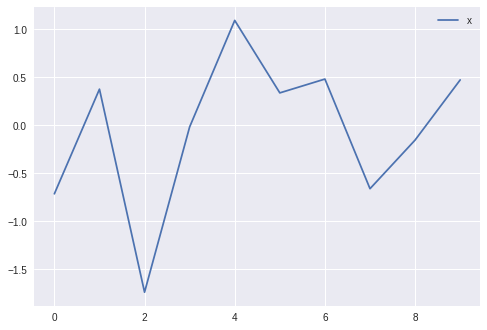

In [60]:
# グラフの描画
df.plot()

詳細なグラフの設定が必要な場合は、Matplotlib の利用をお勧めします。